Chain Coding

In [ ]:
#Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow

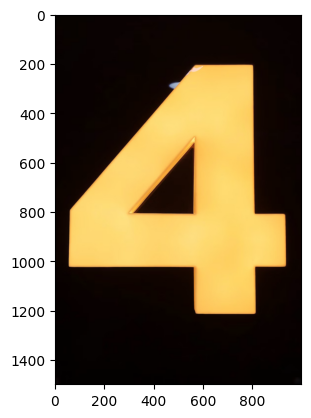

In [ ]:
#Reading the image from the drive

alphabetimg  = "/content/drive/MyDrive/Labs/Computer Vision/Number 4.jpeg"

img = cv2.imread(alphabetimg)

plt.imshow(img)
plt.show()


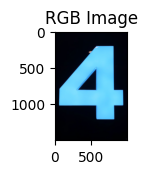

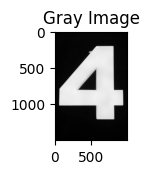

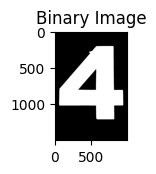

In [ ]:
#Converting image to different color formats:

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)

ret, bin_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)


plt.subplot(3,1,1)
plt.title("RGB Image")
plt.imshow(rgb_img)
plt.show()

plt.subplot(3,1,2)
plt.title("Gray Image")
plt.imshow(gray_img, cmap = "gray")
plt.show()

plt.subplot(3,1,3)
plt.title("Binary Image")
plt.imshow(bin_img, cmap = "gray")
plt.show()



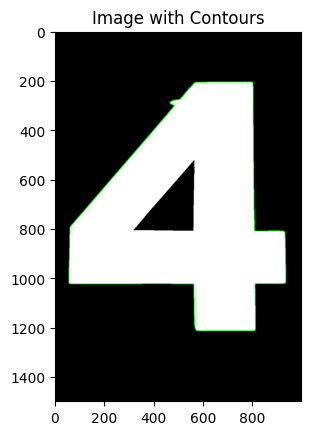

In [ ]:
#Creating Boundary of the image

# Find contours
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
img_contour = cv2.cvtColor(bin_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)  # Green color, thickness = 2

# Display the image with contours
plt.imshow(img_contour)
plt.title("Image with Contours")
plt.show()

# Get the largest contour (for demonstration)
largest_contour = max(contours, key=cv2.contourArea)



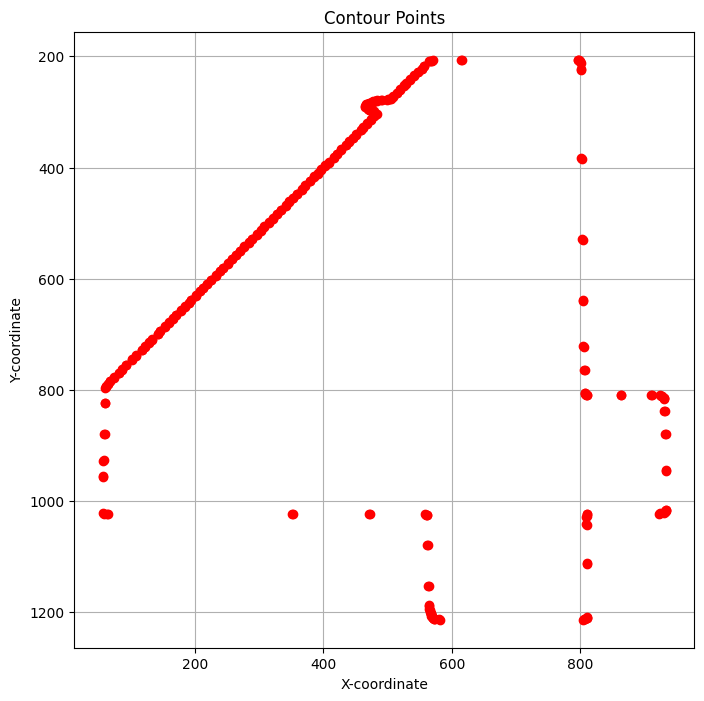

In [ ]:
#Chain Code:
direction = []

# Plot contour points
plt.figure(figsize=(8, 8))
plt.plot(largest_contour[:, 0, 0], largest_contour[:, 0, 1], 'ro')  # Plot contour points as red dots
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.title('Contour Points')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()



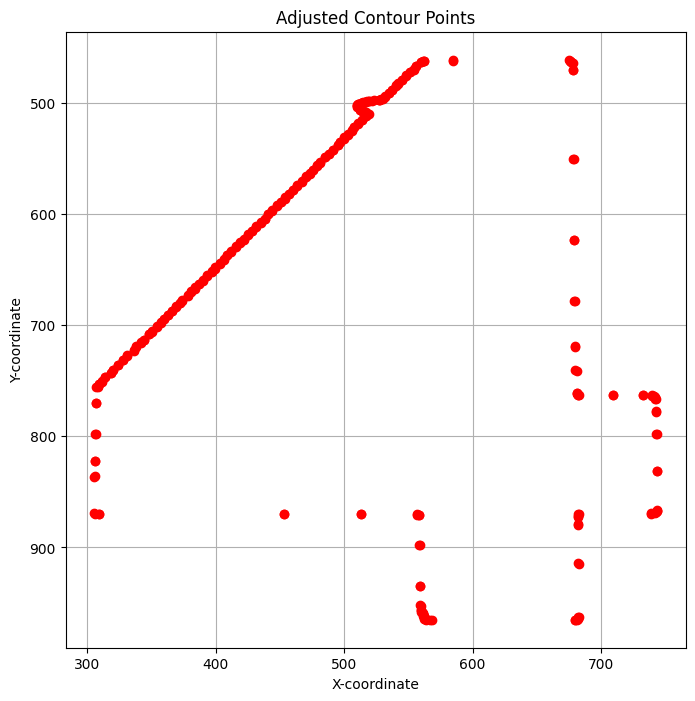

In [ ]:


# Adjust contour points: Translate by (dx, dy) and scale by scale_factor
dx, dy = 50, 50  # Translation values
scale_factor = 0.5  # Scaling factor

adjusted_contour = np.copy(largest_contour)  # Create a copy of the contour

# Apply translation
adjusted_contour[:, 0, 0] += dx
adjusted_contour[:, 0, 1] += dy

# Apply scaling
center = np.mean(adjusted_contour, axis=0)[0]  # Calculate the center of the contour
adjusted_contour[:, 0, :] = scale_factor * (adjusted_contour[:, 0, :] - center) + center

# Plot adjusted contour points
plt.figure(figsize=(8, 8))
plt.plot(adjusted_contour[:, 0, 0], adjusted_contour[:, 0, 1], 'ro')  # Plot contour points as red dots
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.title('Adjusted Contour Points')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


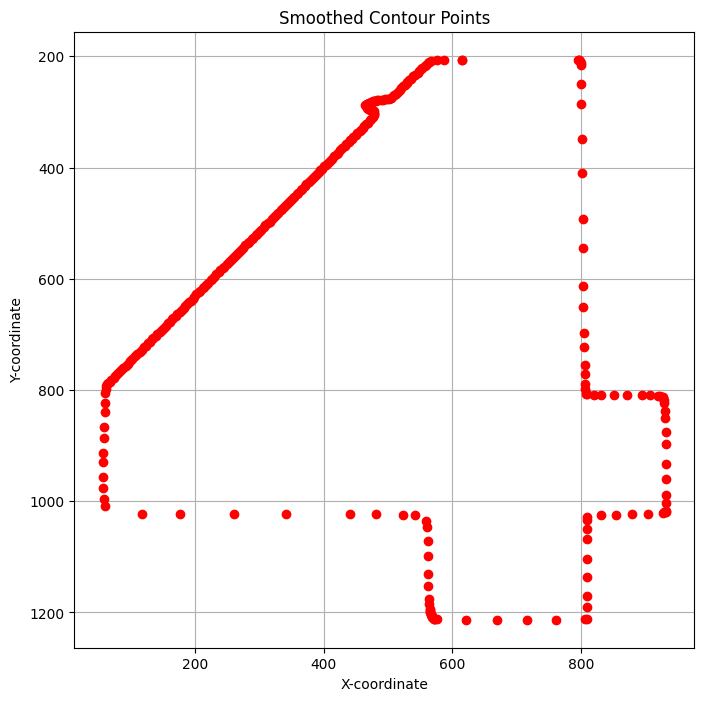

In [ ]:

# Define the smoothing window size (number of points to consider in the moving average)
window_size = 5

# Apply moving average smoothing to contour points
smoothed_contour = np.copy(largest_contour)  # Create a copy of the contour
for i in range(window_size // 2, len(largest_contour) - window_size // 2):
    smoothed_contour[i, 0, 0] = np.mean(largest_contour[i - window_size // 2:i + window_size // 2 + 1, 0, 0])
    smoothed_contour[i, 0, 1] = np.mean(largest_contour[i - window_size // 2:i + window_size // 2 + 1, 0, 1])

# Plot smoothed contour points
plt.figure(figsize=(8, 8))
plt.plot(smoothed_contour[:, 0, 0], smoothed_contour[:, 0, 1], 'ro')  # Plot contour points as red dots
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.title('Smoothed Contour Points')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()


In [ ]:
# Function to generate chain code
def generate_chain_code(contour):
    contour = np.squeeze(contour)  # Ensure contour is a 2D array
    contour = contour.tolist()  # Convert to list for easier manipulation
    chain_code = []
    for i in range(len(contour) - 1):
        dx = contour[i + 1][0] - contour[i][0]
        dy = contour[i][1] - contour[i + 1][1]  # Inverted dy for top-right direction
        # Ensure dy is positive for consistency
        if dy < 0:
            dy = -dy
        # Adjust dx and dy to handle specific direction mappings
        if dx > 0 and dy > 0:  # Top-right
            direction = 1
        elif dx > 0 and dy < 0:  # Bottom-right
            direction = 7
        elif dx < 0 and dy > 0:  # Bottom-left
            direction = 5
        else:
            # Calculate direction based on the adjusted dx and dy values
            if dx == 0 and dy == 1:  # Up
                direction = 2
            elif dx == -1 and dy == 1:  # Up-Left
                direction = 3
            elif dx == -1 and dy == 0:  # Left
                direction = 4
            elif dx == -1 and dy == -1:  # Down-Left
                direction = 5
            elif dx == 0 and dy == -1:  # Down
                direction = 6
            elif dx == 1 and dy == -1:  # Down-Right
                direction = 7
            elif dx == 1 and dy == 0:  # Right
                direction = 0
            else:
                # Handle any other cases as needed
                direction = -1  # Placeholder for undefined direction
        chain_code.append(direction)
    return chain_code

# Generate chain code for the largest contour
chain_code = generate_chain_code(largest_contour)

# Print the chain code
print("Chain Code:", chain_code)

Chain Code: [5, -1, 5, -1, 5, 4, 5, 2, 5, 2, 5, 4, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 2, 5, -1, 1, 0, 1, 0, 1, 0, 1, 0, 1, -1, 1, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 0, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 2, 1, 2, 0, 1, 0, 1, -1, 1, -1, 1, -1, 1, 2, 1, -1, 5, -1, 5, -1, 1, -1, 1, -1, 1, -1, 1, 2, 1, 2, 1, -1, 5, -1, 5, -1, 5, -1, 5, 2, 5, 4, 5, -1, 5, -1, 5, -1, 5, 4, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, -1, 5, 2, 5, 4, 5]


In [ ]:
#Difference Code and Shape No.:

def chain_to_diff_shape(chain_code):
    diff_code = [0] * len(chain_code)
    shape_number = 0

    for i in range(len(chain_code)):
        diff_code[i] = (chain_code[i] - chain_code[(i + 1) % len(chain_code)]) % 8

    # Calculate shape number
    for i in range(len(diff_code)):
        if diff_code[i] != 0:
            shape_number += 1

    return diff_code, shape_number

# Example usage
chain_code = [0, 1, 2, 3, 4, 5, 6, 7]  # Example chain code
diff_code, shape_number = chain_to_diff_shape(chain_code)
print("Difference Code:", diff_code)
print("Shape Number:", shape_number)


Difference Code: [7, 7, 7, 7, 7, 7, 7, 7]
Shape Number: 8
